In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
hcv=pd.read_csv('HCV-Egy-Data.csv')
hcv.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue_generalized,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baseline_histological_staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [3]:
df=pd.DataFrame(data=hcv)
df.tail()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue_generalized,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baseline_histological_staging
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3
1384,55,2,26,1,2,2,2,1,2,1,...,64,71,34,1190577,628730,5,5,5,13,3


In [4]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue_generalized', 'Jaundice', 'Epigastric_pain', 'WBC',
       'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT_12', 'ALT_24',
       'ALT_36', 'ALT_48', 'ALT_after_24w', 'RNA_Base', 'RNA_4', 'RNA_12',
       'RNA_EOT', 'RNA_EF', 'Baseline_histological_Grading',
       'Baseline_histological_staging'],
      dtype='object')

In [5]:
df.dtypes

Age                                int64
Gender                             int64
BMI                                int64
Fever                              int64
Nausea/Vomting                     int64
Headache                           int64
Diarrhea                           int64
Fatigue_generalized                int64
Jaundice                           int64
Epigastric_pain                    int64
WBC                                int64
RBC                              float64
HGB                                int64
Plat                             float64
AST1                               int64
ALT1                               int64
ALT4                             float64
ALT_12                             int64
ALT_24                             int64
ALT_36                             int64
ALT_48                             int64
ALT_after_24w                      int64
RNA_Base                           int64
RNA_4                              int64
RNA_12          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                              1385 non-null int64
Gender                           1385 non-null int64
BMI                              1385 non-null int64
Fever                            1385 non-null int64
Nausea/Vomting                   1385 non-null int64
Headache                         1385 non-null int64
Diarrhea                         1385 non-null int64
Fatigue_generalized              1385 non-null int64
Jaundice                         1385 non-null int64
Epigastric_pain                  1385 non-null int64
WBC                              1385 non-null int64
RBC                              1385 non-null float64
HGB                              1385 non-null int64
Plat                             1385 non-null float64
AST1                             1385 non-null int64
ALT1                             1385 non-null int64
ALT4                             1385 non

In [7]:
df.shape

(1385, 29)

In [8]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue_generalized,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baseline_histological_staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


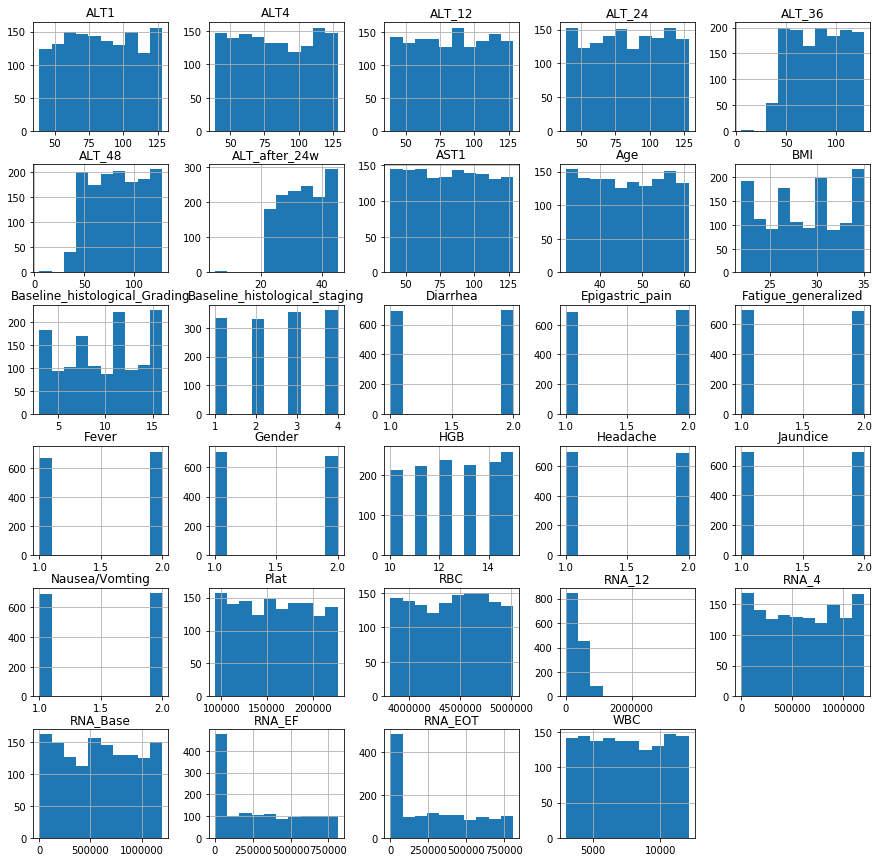

In [9]:
df.hist(figsize=(15,15))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x15eb3605188>,
 'caps': [<matplotlib.lines.Line2D at 0x15eb2e20308>,
 'boxes': [<matplotlib.lines.Line2D at 0x15eb3605f88>],
 'medians': [<matplotlib.lines.Line2D at 0x15eb36c4a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x15eb36c4b88>],
 'means': []}

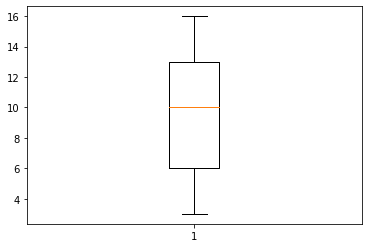

In [10]:
plt.boxplot(df['Baseline_histological_Grading'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x15eb39fa608>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x15eb39f6ac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x15eb39faf08>,
 'cbars': <matplotlib.collections.LineCollection at 0x15eb39fad88>}

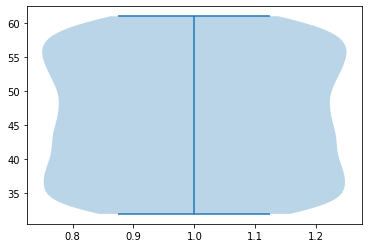

In [11]:
plt.violinplot(df['Age'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x15eb2fff148>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x15eb3009e08>,
 'cmins': <matplotlib.collections.LineCollection at 0x15eb3002e08>,
 'cbars': <matplotlib.collections.LineCollection at 0x15eb3002508>}

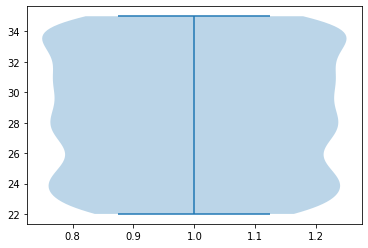

In [12]:
plt.violinplot(df['BMI'])

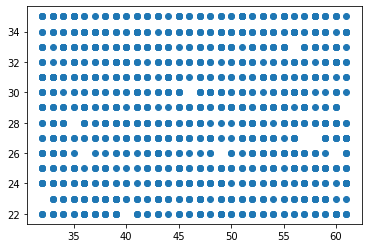

In [13]:
plt.scatter('Age','BMI',data=df)

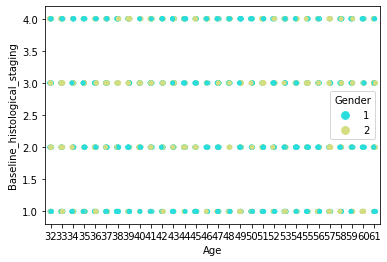

In [14]:
sns.stripplot('Age','Baseline_histological_staging',hue='Gender',data=df,palette='rainbow')

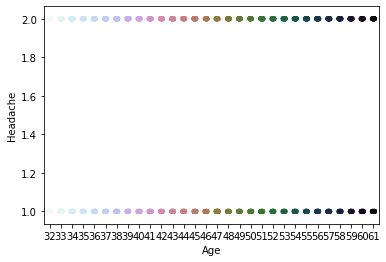

In [24]:
sns.stripplot('Age','Headache',data=df,palette='cubehelix_r')

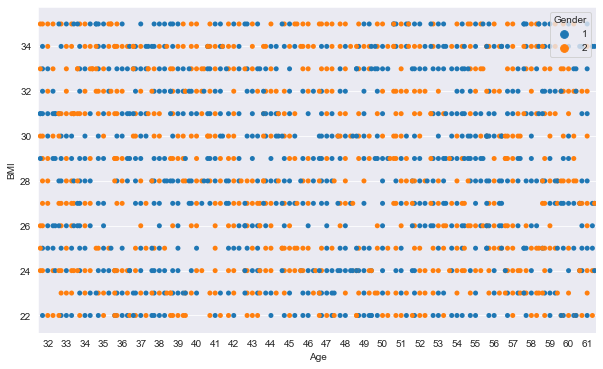

In [27]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.swarmplot('Age','BMI',hue='Gender',data=df)

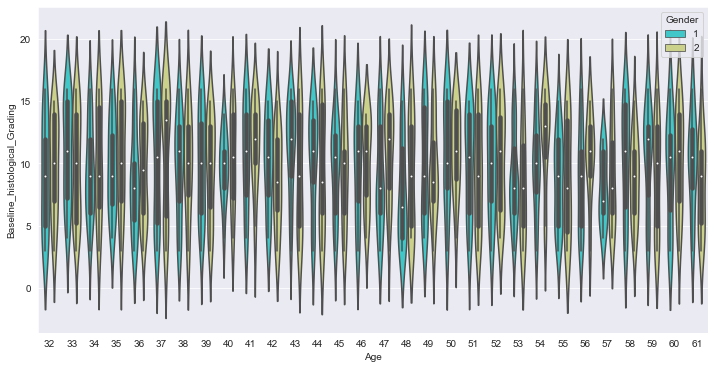

In [31]:
plt.figure(figsize=(12,6))
sns.violinplot('Age','Baseline_histological_Grading',hue='Gender',data=df,palette='rainbow')

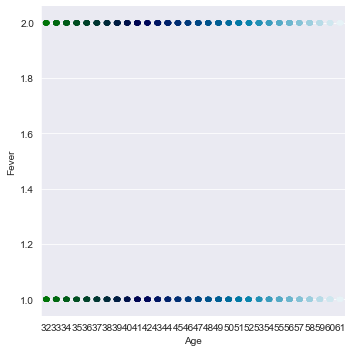

In [32]:
sns.catplot('Age','Fever',data=df,palette='ocean')

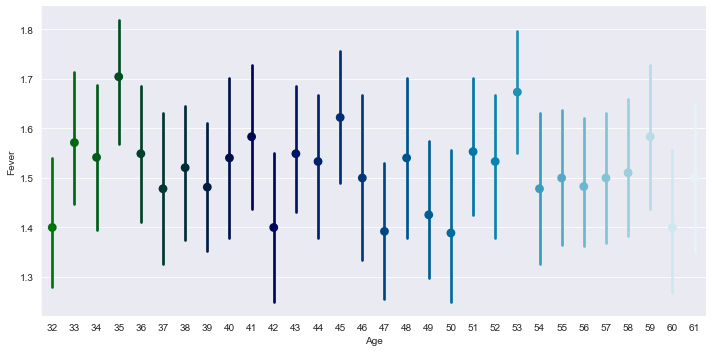

In [34]:
sns.catplot('Age','Fever',data=df,aspect=2,palette='ocean',kind='point')

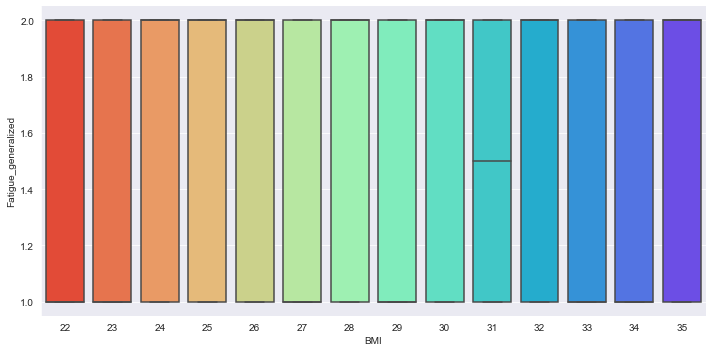

In [36]:
sns.catplot('BMI','Fatigue_generalized',data=df,aspect=2,palette='rainbow_r',kind='box')

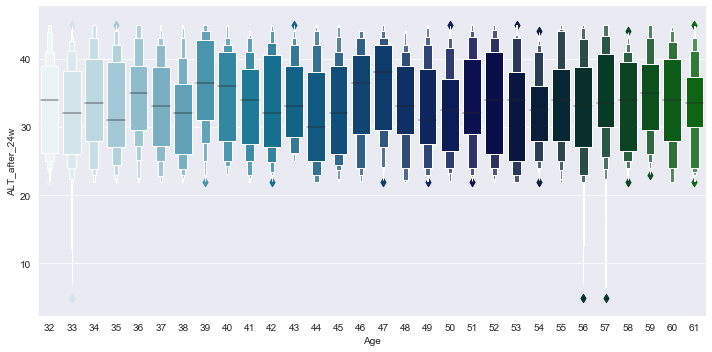

In [37]:
sns.catplot('Age','ALT_after_24w',data=df,aspect=2,palette='ocean_r',kind='boxen')

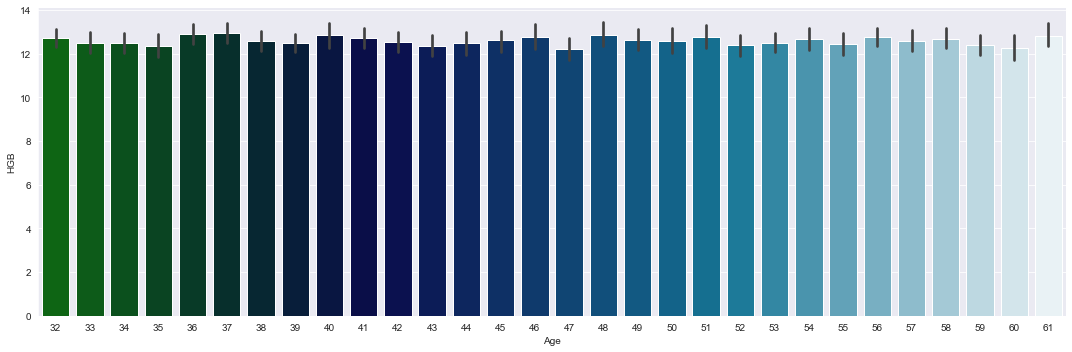

In [39]:
sns.catplot('Age','HGB',data=df,aspect=3,palette='ocean',kind='bar')

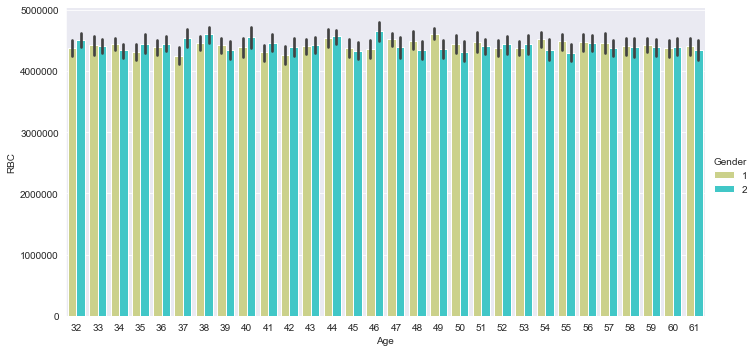

In [41]:
sns.catplot('Age','RBC',hue='Gender',data=df,aspect=2,palette='rainbow_r',kind='bar')

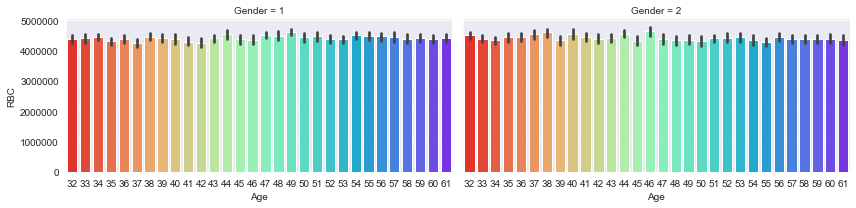

In [43]:
sns.catplot('Age','RBC',col='Gender',data=df,height=3,aspect=2,palette='rainbow_r',kind='bar')

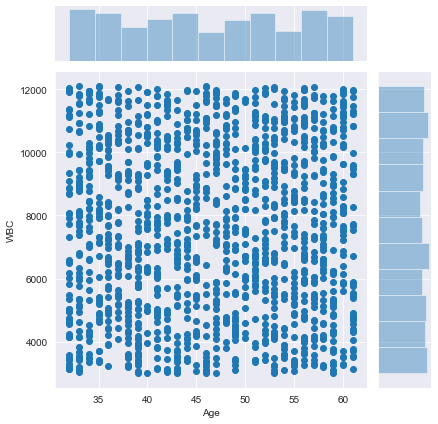

In [44]:
sns.jointplot('Age','WBC',height=6,ratio=5,space=.2,data=df,kind='scatter')

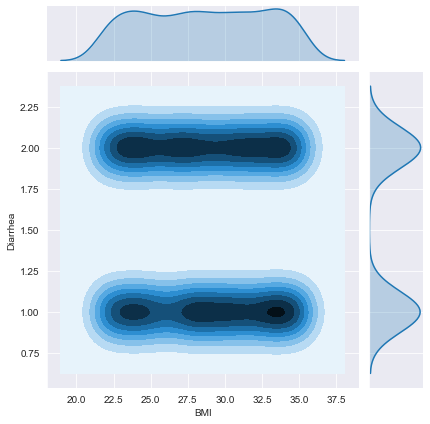

In [45]:
sns.jointplot('BMI','Diarrhea',height=6,ratio=5,space=.2,data=df,kind='kde')

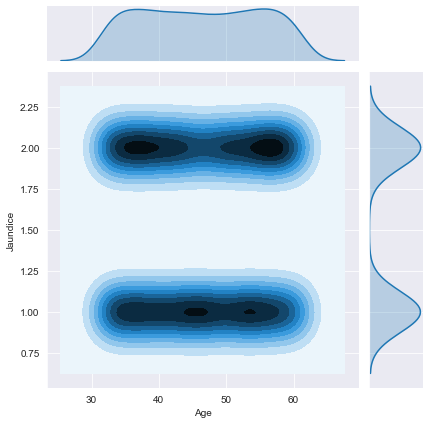

In [46]:
sns.jointplot('Age','Jaundice',height=6,ratio=5,space=.2,data=df,kind='kde')

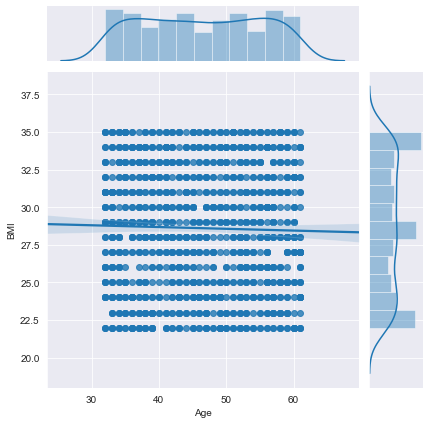

In [49]:
sns.jointplot('Age','BMI',height=6,ratio=5,space=.2,data=df,kind='reg')

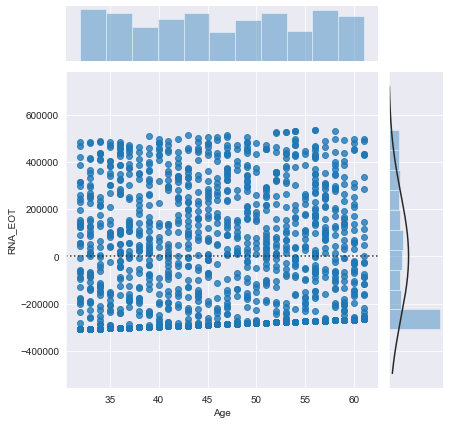

In [50]:
sns.jointplot('Age','RNA_EOT',height=6,ratio=5,space=.2,data=df,kind='resid')

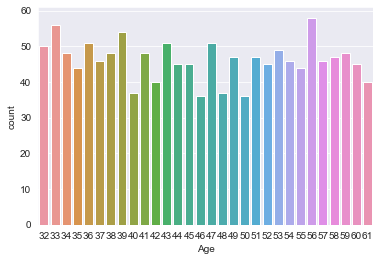

In [51]:
sns.countplot(df['Age'])

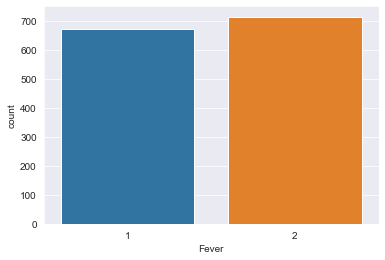

In [52]:
sns.countplot(df['Fever'])

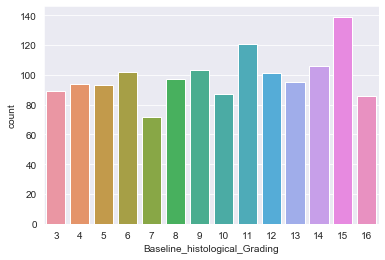

In [53]:
sns.countplot(df['Baseline_histological_Grading'])

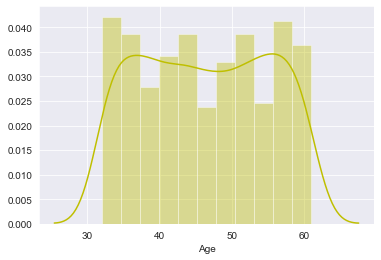

In [54]:
sns.distplot(df['Age'],color='y')

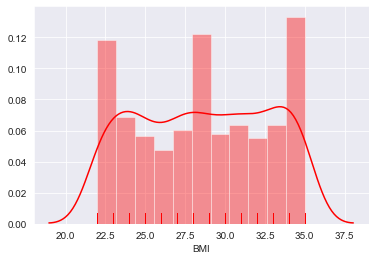

In [56]:
sns.distplot(df['BMI'],color='r',rug=True)

In [15]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue_generalized', 'Jaundice', 'Epigastric_pain', 'WBC',
       'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT_12', 'ALT_24',
       'ALT_36', 'ALT_48', 'ALT_after_24w', 'RNA_Base', 'RNA_4', 'RNA_12',
       'RNA_EOT', 'RNA_EF', 'Baseline_histological_Grading',
       'Baseline_histological_staging'],
      dtype='object')

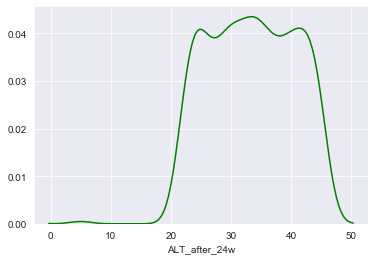

In [57]:
sns.distplot(df['ALT_after_24w'],color='g',hist=False)

In [15]:
df.isnull().sum()

Age                              0
Gender                           0
BMI                              0
Fever                            0
Nausea/Vomting                   0
Headache                         0
Diarrhea                         0
Fatigue_generalized              0
Jaundice                         0
Epigastric_pain                  0
WBC                              0
RBC                              0
HGB                              0
Plat                             0
AST1                             0
ALT1                             0
ALT4                             0
ALT_12                           0
ALT_24                           0
ALT_36                           0
ALT_48                           0
ALT_after_24w                    0
RNA_Base                         0
RNA_4                            0
RNA_12                           0
RNA_EOT                          0
RNA_EF                           0
Baseline_histological_Grading    0
Baseline_histologica

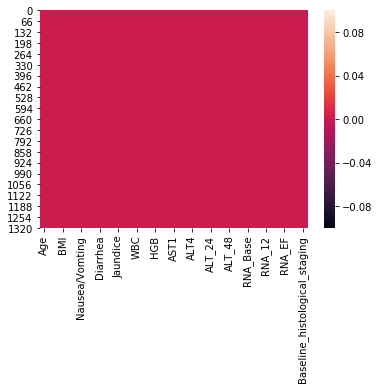

In [16]:
sns.heatmap(df.isnull())

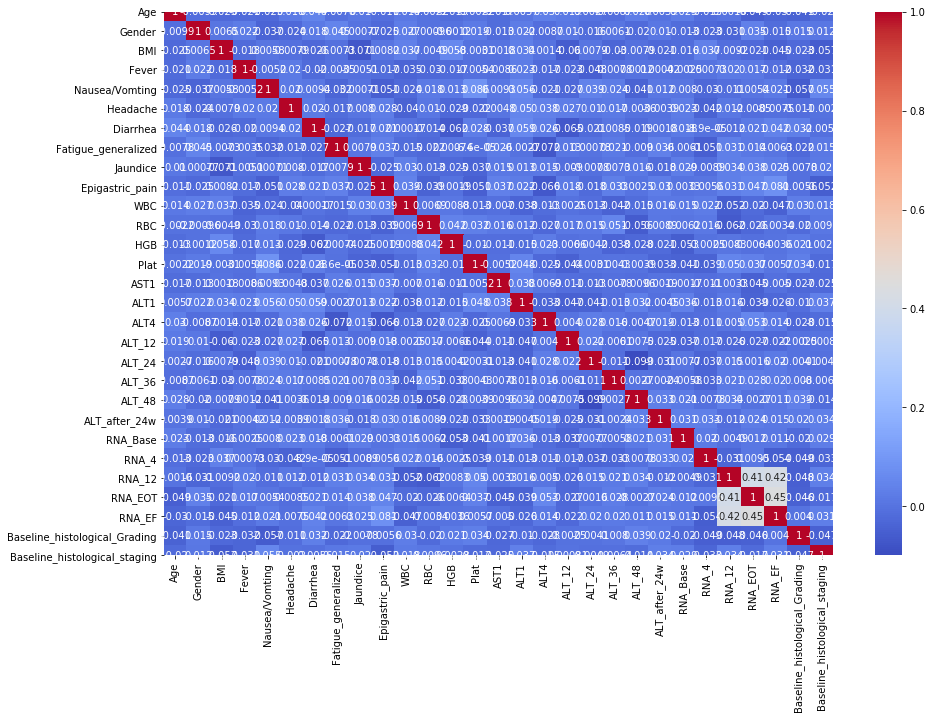

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [18]:
df.skew()

Age                              0.006835
Gender                           0.041932
BMI                             -0.035573
Fever                           -0.062191
Nausea/Vomting                  -0.010119
Headache                         0.015902
Diarrhea                        -0.010119
Fatigue_generalized              0.004337
Jaundice                        -0.004337
Epigastric_pain                 -0.015902
WBC                              0.016081
RBC                             -0.047663
HGB                             -0.046887
Plat                             0.032442
AST1                             0.030132
ALT1                             0.017926
ALT4                             0.023289
ALT_12                          -0.011167
ALT_24                          -0.033095
ALT_36                          -0.041431
ALT_48                          -0.044457
ALT_after_24w                   -0.111222
RNA_Base                         0.018666
RNA_4                            0

Age                                 AxesSubplot(0.125,0.749828;0.110714x0.130172)
Gender                           AxesSubplot(0.257857,0.749828;0.110714x0.130172)
BMI                              AxesSubplot(0.390714,0.749828;0.110714x0.130172)
Fever                            AxesSubplot(0.523571,0.749828;0.110714x0.130172)
Nausea/Vomting                   AxesSubplot(0.656429,0.749828;0.110714x0.130172)
Headache                         AxesSubplot(0.789286,0.749828;0.110714x0.130172)
Diarrhea                            AxesSubplot(0.125,0.593621;0.110714x0.130172)
Fatigue_generalized              AxesSubplot(0.257857,0.593621;0.110714x0.130172)
Jaundice                         AxesSubplot(0.390714,0.593621;0.110714x0.130172)
Epigastric_pain                  AxesSubplot(0.523571,0.593621;0.110714x0.130172)
WBC                              AxesSubplot(0.656429,0.593621;0.110714x0.130172)
RBC                              AxesSubplot(0.789286,0.593621;0.110714x0.130172)
HGB             

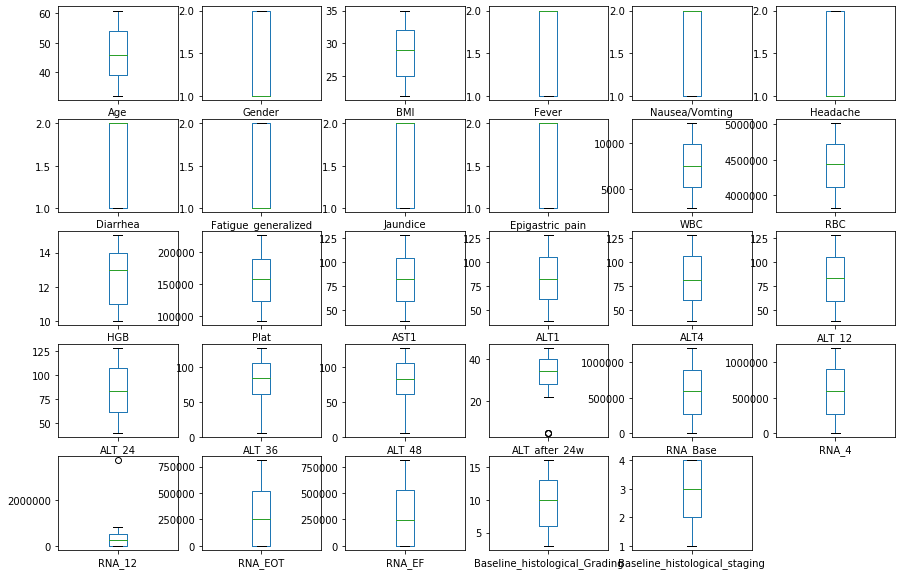

In [19]:
df.plot(kind='box',subplots=True,layout=(5,6),figsize=(15,10))

In [20]:
df.shape

(1385, 29)

In [21]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue_generalized', 'Jaundice', 'Epigastric_pain', 'WBC',
       'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT_12', 'ALT_24',
       'ALT_36', 'ALT_48', 'ALT_after_24w', 'RNA_Base', 'RNA_4', 'RNA_12',
       'RNA_EOT', 'RNA_EF', 'Baseline_histological_Grading',
       'Baseline_histological_staging'],
      dtype='object')

In [22]:
df['Baseline_histological_Grading'].unique()

array([13,  4, 10, 11, 12,  5, 15, 16,  8,  9,  3,  6,  7, 14],
      dtype=int64)

In [23]:
df['Baseline_histological_staging'].unique()

array([2, 4, 3, 1], dtype=int64)

In [24]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [25]:
le=LabelEncoder()
scale=StandardScaler()

In [75]:
x=df.drop('Baseline_histological_Grading',axis=1)
x.shape

(1385, 28)

In [76]:
y=df['Baseline_histological_Grading']
y

0       13
1        4
2        4
3       10
4       11
        ..
1380    15
1381    10
1382     6
1383    15
1384    13
Name: Baseline_histological_Grading, Length: 1385, dtype: int64

In [77]:
model_Grading=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

In [78]:
max_accu_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for c in model_Grading:
        c.fit(x_train,y_train)
        c.score(x_train,y_train)
        predc=c.predict(x_test)
        accu_value=accuracy_score(y_test,predc)
        print('Accuracy score correspond to random state',r_state ,'is',accu_value)
        if accu_value>max_accu_score:
            max_accu_score=accu_value
            final_state=r_state
            final_model=c
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_accu_score,'and model_Grading is',final_model)

Accuracy score correspond to random state 40 is 0.08852459016393442
Accuracy score correspond to random state 40 is 0.07540983606557378
Accuracy score correspond to random state 40 is 0.08196721311475409
Accuracy score correspond to random state 40 is 0.07213114754098361
Accuracy score correspond to random state 41 is 0.10491803278688525
Accuracy score correspond to random state 41 is 0.05245901639344262
Accuracy score correspond to random state 41 is 0.05573770491803279
Accuracy score correspond to random state 41 is 0.08524590163934426
Accuracy score correspond to random state 42 is 0.10163934426229508
Accuracy score correspond to random state 42 is 0.06229508196721312
Accuracy score correspond to random state 42 is 0.08524590163934426
Accuracy score correspond to random state 42 is 0.07213114754098361
Accuracy score correspond to random state 43 is 0.12459016393442623
Accuracy score correspond to random state 43 is 0.06229508196721312
Accuracy score correspond to random state 43 is 

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=52)

In [81]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.13114754098360656
[[ 0  0  0  0  0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        22
           8       0.00 

In [26]:
x=df.drop('Baseline_histological_staging',axis=1)
x.shape

(1385, 28)

In [27]:
y=df['Baseline_histological_staging']
y

0       2
1       2
2       4
3       3
4       1
       ..
1380    4
1381    2
1382    2
1383    3
1384    3
Name: Baseline_histological_staging, Length: 1385, dtype: int64

In [28]:
model_staging=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

In [43]:
max_accu_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for c in model_staging:
        c.fit(x_train,y_train)
        c.score(x_train,y_train)
        predc=c.predict(x_test)
        accu_value=accuracy_score(y_test,predc)
        print('Accuracy score correspond to random state',r_state ,'is',accu_value)
        if accu_value>max_accu_score:
            max_accu_score=accu_value
            final_state=r_state
            final_model=c
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_accu_score,'and model_Grading is',final_model)

Accuracy score correspond to random state 40 is 0.2459016393442623
Accuracy score correspond to random state 40 is 0.25573770491803277
Accuracy score correspond to random state 40 is 0.2721311475409836
Accuracy score correspond to random state 40 is 0.26885245901639343
Accuracy score correspond to random state 41 is 0.24262295081967214
Accuracy score correspond to random state 41 is 0.26229508196721313
Accuracy score correspond to random state 41 is 0.26557377049180325
Accuracy score correspond to random state 41 is 0.21639344262295082
Accuracy score correspond to random state 42 is 0.21967213114754097
Accuracy score correspond to random state 42 is 0.23934426229508196
Accuracy score correspond to random state 42 is 0.21967213114754097
Accuracy score correspond to random state 42 is 0.24262295081967214
Accuracy score correspond to random state 43 is 0.25573770491803277
Accuracy score correspond to random state 43 is 0.2360655737704918
Accuracy score correspond to random state 43 is 0.2

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=46)

In [58]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.2754098360655738
[[20 19 19 15]
 [21 17 13 22]
 [18 16 19 25]
 [18 15 20 28]]
              precision    recall  f1-score   support

           1       0.26      0.27      0.27        73
           2       0.25      0.23      0.24        73
           3       0.27      0.24      0.26        78
           4       0.31      0.35      0.33        81

    accuracy                           0.28       305
   macro avg       0.27      0.27      0.27       305
weighted avg       0.27      0.28      0.27       305



In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameter={'criterion':('gini','entropy'),'splitter':('best','random')}
grid=GridSearchCV(dtc,parameter)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'splitter': 'best'}


In [84]:
dtc=DecisionTreeClassifier(criterion='gini',splitter='best')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.2786885245901639
[[20 17 21 15]
 [19 18 17 19]
 [20 13 17 28]
 [22 13 16 30]]
              precision    recall  f1-score   support

           1       0.25      0.27      0.26        73
           2       0.30      0.25      0.27        73
           3       0.24      0.22      0.23        78
           4       0.33      0.37      0.35        81

    accuracy                           0.28       305
   macro avg       0.28      0.28      0.28       305
weighted avg       0.28      0.28      0.28       305



In [85]:
from sklearn.externals import joblib

In [86]:
joblib.dump(dtc,'EgyptianFile.obj')

['EgyptianFile.obj']